In [4]:
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchjpeg import dct
from PIL import Image
import seaborn as sns
import numpy as np
import torch
import math
import cv2
import os

# L2 norm between Downsample by 1/4 images

In [2]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

transform = transforms.Compose([
        transforms.ToTensor()
        ])

downsample_components_list = []
for img_path in overall_img_path_list:
    image = Image.open(img_path).convert('RGB')
    x = transform(image).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img -= 128
    downsample_img = transforms.Resize(size=int(original_in_img.shape[-1]/block_size))(original_in_img)
    downsample_components_list.append(downsample_img)

downsample_components_list2 = []
for img_path in overall_img_path_list2:
    image2 = Image.open(img_path).convert('RGB')
    x = transform(image2).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img2 = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img2 -= 128
    downsample_img2 = transforms.Resize(size=int(original_in_img2.shape[-1]/block_size))(original_in_img2)
    downsample_components_list2.append(downsample_img2)

downsample_components_overall = downsample_components_list + downsample_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(downsample_components_overall)

l2_norm_expression_list_overall = np.zeros((len(downsample_components_overall), len(downsample_components_overall)))
for i in range(num_images):
    for j in range(num_images):
        l2_norm_expression_list_overall[i][j] = np.linalg.norm(downsample_components_overall[i] - downsample_components_overall[j])
np.save(f"l2_norm_downsample_in_img_component.npy", l2_norm_expression_list_overall)

<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_513596/272339963.py:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
/tmp/ipykernel_513596/272339963.py:38: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


# L2 Norm Among Original Images without any downsampling

In [5]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

transform = transforms.Compose([
        transforms.ToTensor()
        ])

downsample_components_list = []
for img_path in overall_img_path_list:
    image = Image.open(img_path).convert('RGB')
    x = transform(image).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img -= 128
    downsample_components_list.append(original_in_img)

downsample_components_list2 = []
for img_path in overall_img_path_list2:
    image2 = Image.open(img_path).convert('RGB')
    x = transform(image2).unsqueeze(0)
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    original_in_img2 = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    original_in_img2 -= 128
    downsample_components_list2.append(original_in_img2)

downsample_components_overall = downsample_components_list + downsample_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(downsample_components_overall)

l2_norm_expression_list_overall = np.zeros((len(downsample_components_overall), len(downsample_components_overall)))
for i in range(num_images):
    for j in range(num_images):
        l2_norm_expression_list_overall[i][j] = np.linalg.norm(downsample_components_overall[i] - downsample_components_overall[j])
np.save(f"l2_norm_in_img_component.npy", l2_norm_expression_list_overall)

<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_513596/536562697.py:27: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
/tmp/ipykernel_513596/536562697.py:37: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


In [6]:
print(l2_norm_expression_list_overall.shape)
print(np.max(l2_norm_expression_list_overall))

(131, 131)
13191.1337890625


#  L2 Norm among a single frequency component of training dataset

In [7]:
block_size = 4
total_frequency_component = block_size * block_size

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

def img_reorder(x, bs, ch, h, w):
    x = (x + 1) / 2 * 255
    assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")
    x = dct.to_ycbcr(x)  # comvert RGB to YCBCR
    x -= 128
    x = x.view(bs * ch, 1, h, w)
    x = F.unfold(x, kernel_size=(block_size, block_size), dilation=1, padding=0, stride=(block_size, block_size))
    x = x.transpose(1, 2)
    x = x.view(bs, ch, -1, block_size, block_size)
    return x

## Image reordering and testing
def img_inverse_reroder(coverted_img, bs, ch, h, w):
    x = coverted_img.view(bs* ch, -1, total_frequency_component)
    x = x.transpose(1, 2)
    x = F.fold(x, output_size=(h, w), kernel_size=(block_size, block_size), stride=(block_size, block_size))
    x += 128
    x = x.view(bs, ch, h, w)
    x = dct.to_rgb(x)#.squeeze(0)
    x = (x / 255.0) * 2 - 1
    return x

def calculate_block_mse(downsample_in, freq_block, num_freq_component=block_size):
    downsample_img = transforms.Resize(size=int(downsample_in.shape[-1]/num_freq_component))(downsample_in)
    loss_vector = torch.zeros(freq_block.shape[2])
    for i in range(freq_block.shape[2]):
        # calculate the MSE between each frequency components and given input downsampled images
        loss_vector[i] = F.mse_loss(downsample_img, freq_block[:,:,i,:,:])
    return loss_vector

def bdct_4x4(img_path):
    # The original input image comes with it and I disable it to reduce the computation overhead.
    # x = F.interpolate(x, scale_factor=8, mode='bilinear', align_corners=True)
    image = Image.open(img_path).convert('RGB')
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
    x = transform(image).unsqueeze(0)

    back_input = x
    bs, ch, h, w = x.shape
    block_num = h // block_size
    x = img_reorder(x, bs, ch, h, w)
    dct_block = dct.block_dct(x) # BDCT
    dct_block_reorder = dct_block.view(bs, ch, block_num, block_num, total_frequency_component).permute(0, 1, 4, 2, 3) # into (bs, ch, 64, block_num, block_num)

    return  dct_block_reorder

overall_img_path_list = []
path_prefix = "/home/jianming/work/multiface/dataset/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix)
for sgl_dir in all_dir:
    path_average = os.path.join(path_prefix + sgl_dir, "average")
    overall_img_path_list.append(os.path.join(path_average, os.listdir(path_average)[0]))

overall_img_path_list2 = []
path_prefix2 = "/scratch1/jianming/multiface/dataset/m--20180226--0000--6674443--GHS/unwrapped_uv_1024/"
all_dir = os.listdir(path_prefix2)
for sgl_dir in all_dir:
    path_average2 = os.path.join(path_prefix2 + sgl_dir, "average")
    overall_img_path_list2.append(os.path.join(path_average2, os.listdir(path_average2)[0]))

# only for outsourcing all data
outsource_freq_base=0
highest_frequency_components_list = []
for img_path in overall_img_path_list:
    img_blocks = bdct_4x4(img_path)
    highest_frequency_components_list.append(img_blocks[:,:,outsource_freq_base:,:,:])

highest_frequency_components_list2 = []
for img_path in overall_img_path_list2:
    img_blocks = bdct_4x4(img_path)
    highest_frequency_components_list2.append(img_blocks[:,:,outsource_freq_base:,:,:])

highest_frequency_components_overall = highest_frequency_components_list + highest_frequency_components_list2
# L2 norm among highest frequency components after BDCT decomposition
num_images = len(highest_frequency_components_overall)

<>:13: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:13: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:13: SyntaxWarning: assertion is always true, perhaps remove parentheses?
/tmp/ipykernel_513596/239069255.py:13: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert(x.shape[1] == 3, "Wrong input, Channel should equals to 3")


In [8]:
max_l2_norm_list = []
for outsource_component_base_id in range(total_frequency_component):
    outsource_data = np.load(f"/home/jianming/work/Privatar_prj/custom_scripts/prior_success_rate_analysis/prior_success_rate_under_various_partition/l2_norm_outsource_component_{total_frequency_component-outsource_component_base_id}.npy")
    max_l2_norm_list.append(np.max(outsource_data))

In [9]:
max_l2_norm_list

[13191.2470703125,
 2338.54052734375,
 1936.544189453125,
 1809.600830078125,
 1745.7357177734375,
 1403.8924560546875,
 1255.6917724609375,
 1166.1475830078125,
 1107.42822265625,
 940.5419921875,
 826.947265625,
 740.544189453125,
 671.51953125,
 540.6065063476562,
 419.6635437011719,
 285.55902099609375]

In [10]:
# original data L2 norm: l2_norm_expression_list_overall 
# different outsourced components L2 norm list: max_l2_norm_list 
overall_category = l2_norm_expression_list_overall.shape[0]
prior_successful_rate_list = []
for l2_norm in max_l2_norm_list:
    per_list_statistics = []
    for i in range(l2_norm_expression_list_overall.shape[0]):
        per_list_statistics.append(np.where(l2_norm_expression_list_overall[i,:]< l2_norm))

    selective_list= []
    for per_row in per_list_statistics:
        selective_list.append(len(per_row[0]))
        # print(selective_list)
    prior_successful_rate_list.append(np.max(selective_list)/overall_category)
print(prior_successful_rate_list)

[1.0, 0.31297709923664124, 0.16793893129770993, 0.11450381679389313, 0.09923664122137404, 0.022900763358778626, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542]


# KL Divergence

In [11]:
import numpy as np
from scipy.special import rel_entr

def kl_divergence(p, q):
    """
    Calculate the Kullback-Leibler (KL) divergence between two probability distributions.
    
    Args:
    p (array-like): The true probability distribution (must be a valid probability distribution).
    q (array-like): The estimated probability distribution (must be a valid probability distribution).
    
    Returns:
    float: The KL divergence between distributions p and q.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)
    
    # Ensure that neither p nor q contains zero values
    p = np.clip(p, 1e-10, 1)
    q = np.clip(q, 1e-10, 1)
    
    # Calculate KL divergence
    return np.sum(rel_entr(p, q))

# Example usage
p = [0.2]
q = [0.1]

kl_div = kl_divergence(p, q)
print(f"KL Divergence: {kl_div}")

def calculate_edge_kl_divergence(prior, mi):
    posterior = prior
    posterior_pre = prior
    for test_val in range(100):
        posterior = test_val*(1-prior)/100 + prior
        if kl_divergence(posterior_pre, prior) < mi and kl_divergence(posterior, prior) >= mi:
            return posterior
    return 1

KL Divergence: 0.13862943611198905


/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


# Task 1 -- Expression Identification Attack Evaluation

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


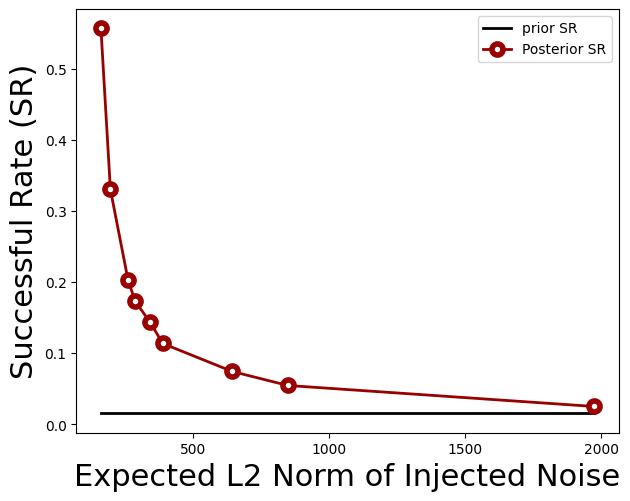

In [12]:
import matplotlib.pyplot as plt

mi_bound = [0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2]
prior_sr = 1/66
posterior_list = []
for mi in mi_bound:
    posterior_list.append(calculate_edge_kl_divergence(prior_sr, mi))

prior_sr =  1/66
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(posterior_list))]
l2_norm_noise = [1973.8664794491713, 847.4006212066104, 642.9570739371546, 387.30074589109705, 341.5147034149104, 286.2747251301866, 260.029043043366, 194.79293115004126, 160]
# l2_norm_
#  = l2_norm_noise[::-1]
# prior_successful_rate_list = prior_successful_rate_list[::-1]
plt.plot([l2_norm_noise[0], l2_norm_noise[-1]], [prior_sr, prior_sr], color="k", linewidth=2)
plt.plot(l2_norm_noise, posterior_list, color="#990000", marker=".", markerfacecolor="#ffffff", markersize=16, linewidth=2, markeredgewidth=4)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("Successful Rate (SR)", fontsize=BIGGER_SIZE)
plt.xlabel("Expected L2 Norm of Injected Noise", fontsize=BIGGER_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

plt.legend(["prior SR", 'Posterior SR'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.savefig('task1_prior_successful_rate.pdf', bbox_inches="tight", transparent=True) 

plt.show()

# Task 2
Calculate Percentage of Input Falling within the L2 norm

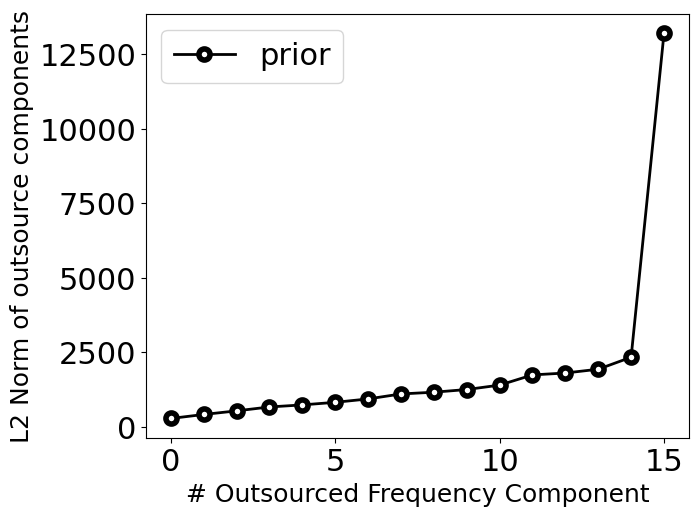

In [21]:
import matplotlib.pyplot as plt

prior_successful_rate_list = [1.0, 0.31297709923664124, 0.16793893129770993, 0.11450381679389313, 0.09923664122137404, 0.022900763358778626, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542]

objected_l2_norm = [13191.2470703125, 2338.54052734375, 1936.544189453125, 1809.600830078125, 1745.7357177734375, 1403.8924560546875, 1255.6917724609375, 1166.1475830078125, 1107.42822265625, 940.5419921875, 826.947265625, 740.544189453125, 671.51953125, 540.6065063476562, 419.6635437011719, 285.55902099609375]

prior_sr =  1/66
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
x = [i for i in range(len(prior_successful_rate_list))]
objected_l2_norm = objected_l2_norm[::-1]
plt.plot(x, objected_l2_norm, color="k", marker=".", markerfacecolor="#ffffff", markersize=16, linewidth=2, markeredgewidth=4)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.ylabel("L2 Norm of outsource components", fontsize=SMALL_SIZE)
plt.xlabel("# Outsourced Frequency Component", fontsize=SMALL_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")

plt.legend(["prior"])#, fontsize=SMALL_SIZE)
# plt.legend(["prior", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.savefig('task2_successful_rate.pdf', bbox_inches="tight", transparent=True) 

plt.show()

In [14]:
prior_successful_rate_list = [1.0, 0.31297709923664124, 0.16793893129770993, 0.11450381679389313, 0.09923664122137404, 0.022900763358778626, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542]
prior_successful_rate_list = prior_successful_rate_list[::-1]

In [15]:
posterior_successful_rate_list_mutual_info_list = []
mutual_info_list = [0.01, 0.1, 1, 2]
for mutual_info in mutual_info_list:
    posterior_successful_rate_list=[]
    for prior_sr in prior_successful_rate_list:
        posterior_successful_rate_list.append(calculate_edge_kl_divergence(prior_sr, mutual_info))
    posterior_successful_rate_list_mutual_info_list.append(posterior_successful_rate_list)

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [4]:
import numpy as np
nois_freq_comp_vs_mi_list = np.load("nois_freq_comp_vs_mi_list.npy")
l2_norm_list = [0.0, 136.231923828125, 272.46384765625, 408.695771484375, 544.9276953125, 681.159619140625, 817.39154296875, 953.623466796875, 1089.855390625, 1226.087314453125, 1362.31923828125, 1498.551162109375, 1634.7830859375, 1771.015009765625, 1907.24693359375, 2043.478857421875]
nois_freq_comp_vs_mi_list_select = nois_freq_comp_vs_mi_list[:, ::2]
l2_norm_list_select = l2_norm_list[::2]

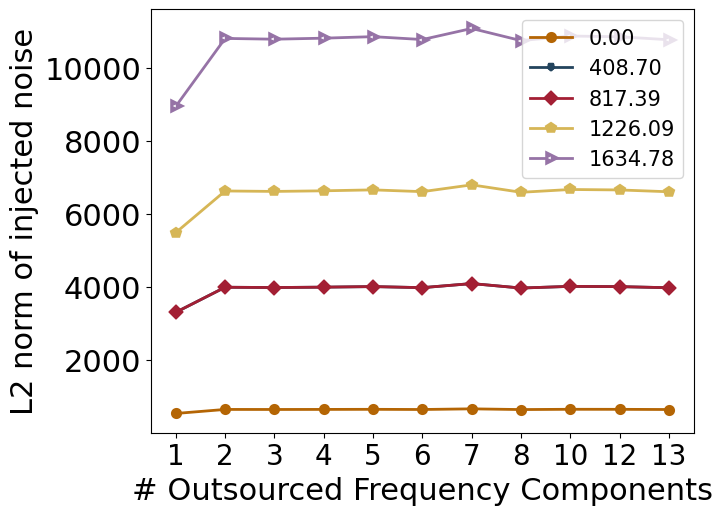

In [20]:
import matplotlib.pyplot as plt

nois_freq_comp_vs_mi_list = np.load("nois_freq_comp_vs_mi_list.npy")
x = [i for i in range(nois_freq_comp_vs_mi_list_select.shape[0])]
l2_norm_list = [0.0, 136.231923828125, 272.46384765625, 408.695771484375, 544.9276953125, 681.159619140625, 817.39154296875, 953.623466796875, 1089.855390625, 1226.087314453125, 1362.31923828125, 1498.551162109375, 1634.7830859375, 1771.015009765625, 1907.24693359375, 2043.478857421875]
select_index = 3
nois_freq_comp_vs_mi_list_select = nois_freq_comp_vs_mi_list[:, ::select_index]
l2_norm_list_select = l2_norm_list[::select_index]

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#A31F34", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
for c_in in range(nois_freq_comp_vs_mi_list_select.shape[1]):
    # plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[c_in], color="k", marker=shape_list[c_in], markerfacecolor="#ffffff", markersize=4, linewidth=2, linestyle="dashed", markeredgewidth=4)[0])
    plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[:,c_in], marker=shape_list[c_in], markerfacecolor="#ffffff", color=color_list[c_in], markersize=4, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[1], marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[2], marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[3], marker="+", markerfacecolor="#ffffff", color=color_list[1], markersize=16, linewidth=2, markeredgewidth=4)[0])

plt.ylabel("L2 norm of injected noise", fontsize=BIGGER_SIZE)
plt.xlabel("# Outsourced Frequency Components", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
plt.legend(plt_handler, [rf"{l2_norm_list_select[i]:0.2f}" for i in range(len(l2_norm_list_select))], loc='best', ncol=1, fontsize=15)

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
x_label = [1,2,3,4,5,6,7,8,10,12,13]
plt.xticks([i for i in x], [str(i) for i in x_label], fontsize=MEDIUM_SIZE)

plt.savefig('l2_norm_under_psr_0.25_under_various_l2_norm_objective_reconstruction_error.pdf', bbox_inches="tight", transparent=True) 

plt.show()

In [6]:
noise_l2_norm_list

[532.61272669,
 3303.78697092,
 4127.36710408,
 4825.63189053,
 5487.43283552,
 6142.64869647,
 6794.58075152,
 7482.86295752,
 8184.38135979,
 8946.90136225,
 9732.77783326,
 10591.55234796,
 11523.60895458,
 12525.66190715,
 13589.16150305,
 14773.85763408,
 16094.42591422,
 19334.91435333,
 21183.10469592,
 23421.96941988,
 25954.07422203,
 29100.02261258,
 32737.52543915,
 37414.31478761,
 42998.54087531,
 50542.14453764]

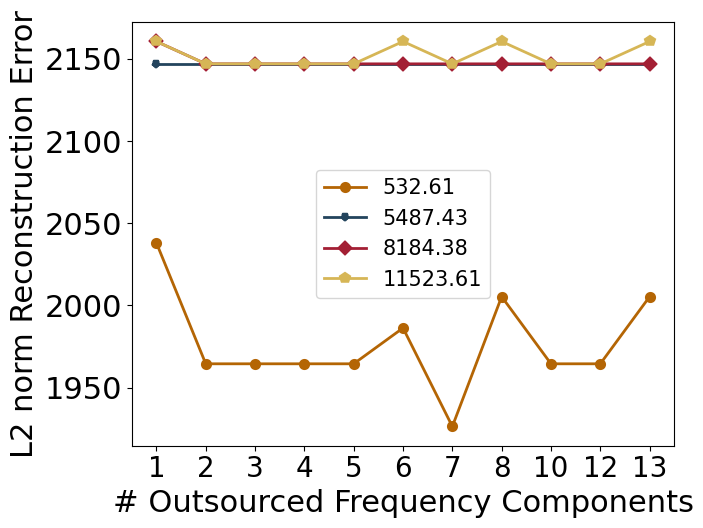

In [7]:
import matplotlib.pyplot as plt
import numpy as np

nois_freq_comp_vs_mi_list = np.load("/home/jianming/work/Privatar_prj/custom_scripts/prior_success_rate_analysis/posterior_success_rate/target_l2_norm_list.npy")
# l2_norm_list = [0.0, 136.231923828125, 272.46384765625, 408.695771484375, 544.9276953125, 681.159619140625, 817.39154296875, 953.623466796875, 1089.855390625, 1226.087314453125, 1362.31923828125, 1498.551162109375, 1634.7830859375, 1771.015009765625, 1907.24693359375, 2043.478857421875]
noise_l2_norm_list = [532.61272669,  3303.78697092,  4127.36710408,  4825.63189053,  5487.43283552,  6142.64869647,  6794.58075152,  7482.86295752,  8184.38135979,  8946.90136225,  9732.77783326, 10591.55234796, 11523.60895458, 12525.66190715, 13589.16150305, 14773.85763408, 16094.42591422, 19334.91435333, 21183.10469592, 23421.96941988, 25954.07422203, 29100.02261258, 32737.52543915, 37414.31478761, 42998.54087531, 50542.14453764]
partition_list = [0.3, 0.305, 0.35, 0.4, 0.42, 0.45, 0.5, 0.6, 0.7, 1.1, 1.2]
PSR=0.25
select_index = 4
max_index = 14
nois_freq_comp_vs_mi_list_select = nois_freq_comp_vs_mi_list[:, :max_index:select_index]
x = [i for i in range(nois_freq_comp_vs_mi_list_select.shape[0])]
noise_l2_norm_list_select = noise_l2_norm_list[:max_index:select_index]

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#A31F34", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
for c_in in range(nois_freq_comp_vs_mi_list_select.shape[1]):
    # plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[c_in], color="k", marker=shape_list[c_in], markerfacecolor="#ffffff", markersize=4, linewidth=2, linestyle="dashed", markeredgewidth=4)[0])
    plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[:,c_in], marker=shape_list[c_in], markerfacecolor="#ffffff", color=color_list[c_in], markersize=4, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[1], marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[2], marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[3], marker="+", markerfacecolor="#ffffff", color=color_list[1], markersize=16, linewidth=2, markeredgewidth=4)[0])

plt.ylabel("L2 norm Reconstruction Error", fontsize=BIGGER_SIZE)
plt.xlabel("# Outsourced Frequency Components", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
plt.legend(plt_handler, [rf"{noise_l2_norm_list_select[i]:0.2f}" for i in range(len(noise_l2_norm_list_select))], loc='best', ncol=1, fontsize=15)

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
x_label = [1,2,3,4,5,6,7,8,10,12,13]
plt.xticks([i for i in x], [str(i) for i in x_label], fontsize=MEDIUM_SIZE)

plt.savefig('l2_norm_under_psr_0.25_under_various_l2_noise.pdf', bbox_inches="tight", transparent=True) 

plt.show()

In [ ]:
import matplotlib.pyplot as plt

nois_freq_comp_vs_mi_list = np.load("mi_freq_comp_vs_noise_list.npy")
x = [i for i in range(nois_freq_comp_vs_mi_list_select.shape[0])]
l2_norm_list = [0.0, 136.231923828125, 272.46384765625, 408.695771484375, 544.9276953125, 681.159619140625, 817.39154296875, 953.623466796875, 1089.855390625, 1226.087314453125, 1362.31923828125, 1498.551162109375, 1634.7830859375, 1771.015009765625, 1907.24693359375, 2043.478857421875]
select_index = 3
nois_freq_comp_vs_mi_list_select = nois_freq_comp_vs_mi_list[:, ::select_index]
l2_norm_list_select = l2_norm_list[::select_index]

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#A31F34", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
for c_in in range(nois_freq_comp_vs_mi_list_select.shape[1]):
    # plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[c_in], color="k", marker=shape_list[c_in], markerfacecolor="#ffffff", markersize=4, linewidth=2, linestyle="dashed", markeredgewidth=4)[0])
    plt_handler.append(ax.plot(x, nois_freq_comp_vs_mi_list_select[:,c_in], marker=shape_list[c_in], markerfacecolor="#ffffff", color=color_list[c_in], markersize=4, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[1], marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[2], marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])
    # plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[3], marker="+", markerfacecolor="#ffffff", color=color_list[1], markersize=16, linewidth=2, markeredgewidth=4)[0])

plt.ylabel("L2 norm of injected noise", fontsize=BIGGER_SIZE)
plt.xlabel("# Outsourced Frequency Components", fontsize=BIGGER_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
plt.legend(plt_handler, [rf"{l2_norm_list_select[i]:0.2f}" for i in range(len(l2_norm_list_select))], loc='best', ncol=1, fontsize=15)

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
x_label = [1,2,3,4,5,6,7,8,10,12,13]
plt.xticks([i for i in x], [str(i) for i in x_label], fontsize=MEDIUM_SIZE)

plt.savefig('l2_norm_under_psr_0.25_under_various_l2_norm_objective_reconstruction_error.pdf', bbox_inches="tight", transparent=True) 

plt.show()

In [17]:
overall_latency = prior_successful_rate_list + posterior_successful_rate_list_mutual_info_list

In [ ]:
import matplotlib.pyplot as plt

x = [i for i in range(len(prior_successful_rate_list))]

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

# create data
fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)
shape_list = ["o", "*", "X", "p", ">", "d", "s", "H", "<"]
legend_list = ["A", "B", "C", "D", "E", "F", "G", "H"]
color_list = ["#B46504", "#23445D", "#A31F34", "#D6B656", "#9673A6", "#B85450", "#6C8EBF", "#82B366"]
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt_handler = []
plt_handler.append(ax.plot(x, prior_successful_rate_list, color="k", marker=".", markerfacecolor="#ffffff", markersize=8, linewidth=2, linestyle="dashed", markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[0], marker="o", markerfacecolor="#ffffff", color=color_list[3], markersize=4, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[1], marker="*", markerfacecolor="#ffffff", color=color_list[0], markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[2], marker="X", markerfacecolor="#ffffff", color="#A31F34", markersize=16, linewidth=2, markeredgewidth=4)[0])
plt_handler.append(ax.plot(x, posterior_successful_rate_list_mutual_info_list[3], marker="+", markerfacecolor="#ffffff", color=color_list[1], markersize=16, linewidth=2, markeredgewidth=4)[0])

plt.ylabel("L2 Norm of Injected Noise", fontsize=BIGGER_SIZE)
plt.xlabel("# Outsourced Frequency Components", fontsize=BIGGER_SIZE)
# plt.xticks([i for i in range(int(max(tflop_list)+1))], [str(i) for i in range(int(max(tflop_list)+1))], fontsize=MEDIUM_SIZE)
# plt.title("Scores by Teams in 4 Rounds")
plt.legend(plt_handler, [r"$||noise||^2_2$ = ", r"L2 norm = ", r"L2 norm = ", r"L2 norm = ",r"L2 norm = "], loc='best', ncol=1, fontsize=15)

# plt.legend(["zcu104", 'Alveo U280'])#, fontsize=SMALL_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.savefig('task2_successful_rate.pdf', bbox_inches="tight", transparent=True) 

plt.show()

# Privacy - Latency - Accuracy Tradeoff Curve

In [16]:
latency_of_diff_partition = [0.0038667488304761906, 0.003675009219047619, 0.0034832696076190473, 0.003291529996190476, 0.003099790384761905, 0.002908050773333333, 0.0027163111619047616, 0.0025245715504761904, 0.0027, 0.003, 0.003, 0.0036, 0.0039, 0.0042, 0.0045]
print(len(latency_of_diff_partition))
accuracy_screen_loss_noisy_test = [0.068, 0.069, 0.068, 0.071, 0.073, 0.083, 0.084, 0.081, 0.078, 0.0753, 0.083, 0.086, 0.076, 0.087, 0.065] 

15


# Violin Plot

In [17]:
prior_successful_rate_list = [1.0, 0.31297709923664124, 0.16793893129770993, 0.11450381679389313, 0.09923664122137404, 0.022900763358778626, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.015267175572519083, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542, 0.007633587786259542]
prior_successful_rate_list = prior_successful_rate_list[::-1]
posterior_successful_rate_list_mutual_info_list = []
mutual_info_list = [0.01, 0.1, 1, 2]
for mutual_info in mutual_info_list:
    posterior_successful_rate_list=[]
    for prior_sr in prior_successful_rate_list:
        posterior_successful_rate_list.append(calculate_edge_kl_divergence(prior_sr, mutual_info))
    posterior_successful_rate_list_mutual_info_list.append(posterior_successful_rate_list)

overall_posterior_successful_rate_list_mutual_info_list = [prior_successful_rate_list] + posterior_successful_rate_list_mutual_info_list

/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app
/home/jianming/conda/envs/pica37/lib/python3.7/site-packages/ipykernel_launcher.py:16: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [18]:
import numpy as np
overall_posterior_successful_rate_list_mutual_info_array = np.array(overall_posterior_successful_rate_list_mutual_info_list)
overall_posterior_successful_rate_list_mutual_info_array = np.transpose(overall_posterior_successful_rate_list_mutual_info_array)

In [19]:
overall_posterior_successful_rate_list_mutual_info_array.shape

(16, 5)

In [20]:
overall_posterior_successful_rate_list_mutual_info_array

array([[0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.02290076, 0.03267176, 0.08152672, 0.3648855 , 0.6189313 ],
       [0.09923664, 0.11725191, 0.18030534, 0.57664122, 0.90992366],
       [0.11450382, 0.13221374, 0.19419847, 0.61038168, 0.94687023],
       [0.16793893, 0.18458015, 0.25114504, 0.70045802, 1.        ],
       [0.3129771 , 0.32671756, 0.

In [21]:
list_idx = []
for i in range(16):
    if i != 9 and i != 11:
        list_idx.append(i)
overall_posterior_successful_rate_list_mutual_info_array[list_idx,:]

array([[0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.00763359, 0.01755725, 0.05725191, 0.28549618, 0.48396947],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.01526718, 0.0251145 , 0.07435115, 0.33038168, 0.55687023],
       [0.02290076, 0.03267176, 0.08152672, 0.3648855 , 0.6189313 ],
       [0.11450382, 0.13221374, 0.19419847, 0.61038168, 0.94687023],
       [0.16793893, 0.18458015, 0.25114504, 0.70045802, 1.        ],
       [0.3129771 , 0.32671756, 0.40229008, 0.92442748, 1.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ]])

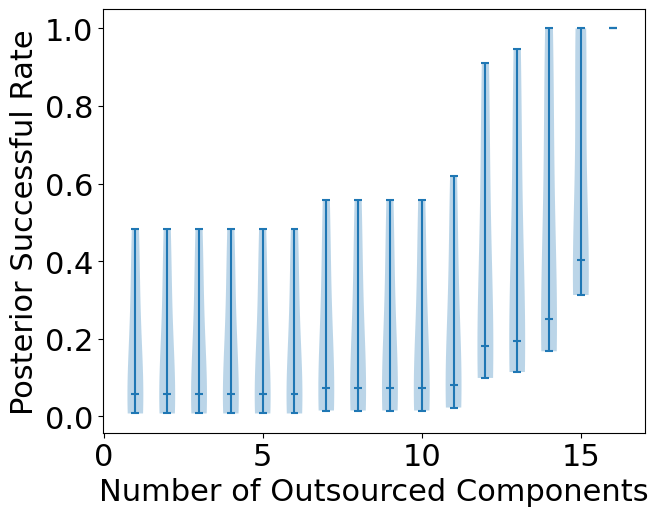

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

block_size = 4
total_frequency_component = block_size * block_size

x = [i for i in range(total_frequency_component)]
all_data = overall_posterior_successful_rate_list_mutual_info_array.tolist()

fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.violinplot(all_data, showmeans=False, showmedians=True)

plt.ylabel("Posterior Successful Rate", fontsize=BIGGER_SIZE)
plt.xlabel("Number of Outsourced Components", fontsize=BIGGER_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize

plt.savefig('PSR_under_partitioning.pdf', bbox_inches="tight", transparent=True) 
plt.show()

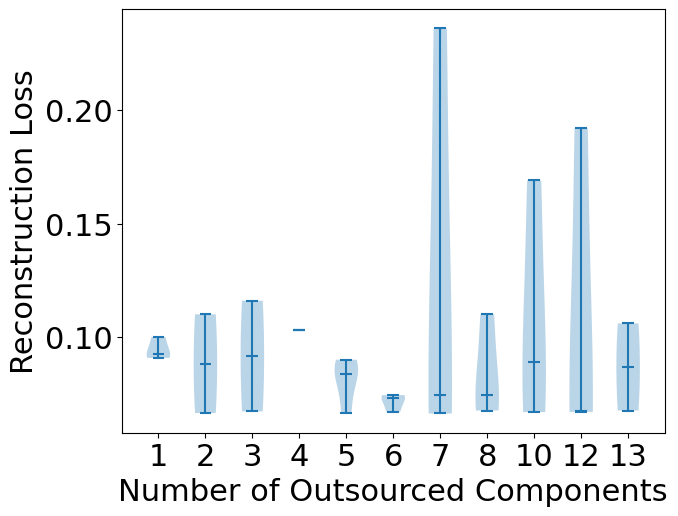

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

block_size = 4
total_frequency_component = block_size * block_size

x = [i for i in range(total_frequency_component)]
all_data =[
[0.0908, 0.092642, 0.10],
[0.0665, 0.11],
[0.0672, 0.116],
[0.103],
[0.0663, 0.08168, 0.086, 0.09],
[0.0671, 0.0744, 0.073],
[0.0663, 0.0744, 0.236],
[0.0676, 0.0744, 0.11],
[0.0669, 0.089, 0.169],
[0.0672,  0.067, 0.192],
[0.0676, 0.106]]

fig = plt.figure(figsize=[7,5.5])
ax = plt.subplot(111)

SMALL_SIZE = 18
MEDIUM_SIZE = 20
BIGGER_SIZE = 22

plt.violinplot(all_data, showmeans=False, showmedians=True)

plt.ylabel("Reconstruction Loss", fontsize=BIGGER_SIZE)
plt.xlabel("Number of Outsourced Components", fontsize=BIGGER_SIZE)
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
x_labels = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 13]
plt.xticks([i for i in range(1,12)], [str(label_x) for label_x in x_labels])#, rotation=20)

plt.savefig('Accuracy_under_partitioning.pdf', bbox_inches="tight", transparent=True) 
plt.show()